In [1]:
from glob import glob
import json
import pandas as pd

files = glob('./output/experiments_population_coding/*.json')

all_dicts = []

for file in files:
    with open(file, "r") as f:
        data = json.load(f)
        all_dicts.append(data)

df = pd.DataFrame(all_dicts)

df

,epochs,training_accuracy,test_accuracy,time,loss_config,beta,number_hidden_layer,number_hidden_neurons
0,11,0.518146,51.104240,5258.321203,rate_code_cross_entropy,NaN,NaN,NaN
1,1,0.000000,0.000000,1312.854504,population_coding,0.99,1.0,1000.0
2,8,0.949240,73.189046,3908.861345,membrane_potential_cross_entropy,NaN,NaN,NaN


In [2]:
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from constants import (
    BETA,
    NUMBER_HIDDEN_NEURONS,
    NUMBER_INPUT_NEURONS,
    NUMBER_OUTPUT_NEURONS,
    THRESHOLD,
    TIME_STEPS,
)

model = ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS, 
                                         number_hidden_neurons=3000, 
                                         number_output_neurons=NUMBER_OUTPUT_NEURONS, 
                                         beta=BETA, 
                                         threshold=THRESHOLD,
                                         time_steps=TIME_STEPS, 
                                         number_hidden_layers=2,
                                         sparsity=0)

TypeError: __init__() got an unexpected keyword argument 'sparsity'

In [ ]:
import torch
import copy

membrane_potential_cross_entropy = copy.deepcopy(model)
membrane_potential_cross_entropy.load_state_dict(torch.load('./models/experiments_population_coding/best_grid_search_membrane_potential_cross_entropy.pth'))

rate_code_cross_entropy = copy.deepcopy(model)
rate_code_cross_entropy.load_state_dict(torch.load('./models/experiments_population_coding/best_grid_search_rate_code_cross_entropy.pth'))

<All keys matched successfully>

In [ ]:
import torch
from util.utils import get_device
from torch.utils.data import DataLoader
from tonic import datasets, transforms

selection_index = 2
device = get_device()

frame_transform = transforms.ToFrame(
    sensor_size=datasets.SHD.sensor_size,  
    n_time_bins=TIME_STEPS
)

test_data = datasets.SHD("./data", transform=frame_transform, train=False)

test_data_loader = DataLoader(test_data, shuffle=False, batch_size=32)

data, target = list(test_data_loader)[0]
data = data.to_dense().to(torch.float32).squeeze().permute(1, 0, 2).to(device)

x_selected = data[:, selection_index, :]
y_selected = target[selection_index]


/home/mark/anaconda3/envs/whk-snn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


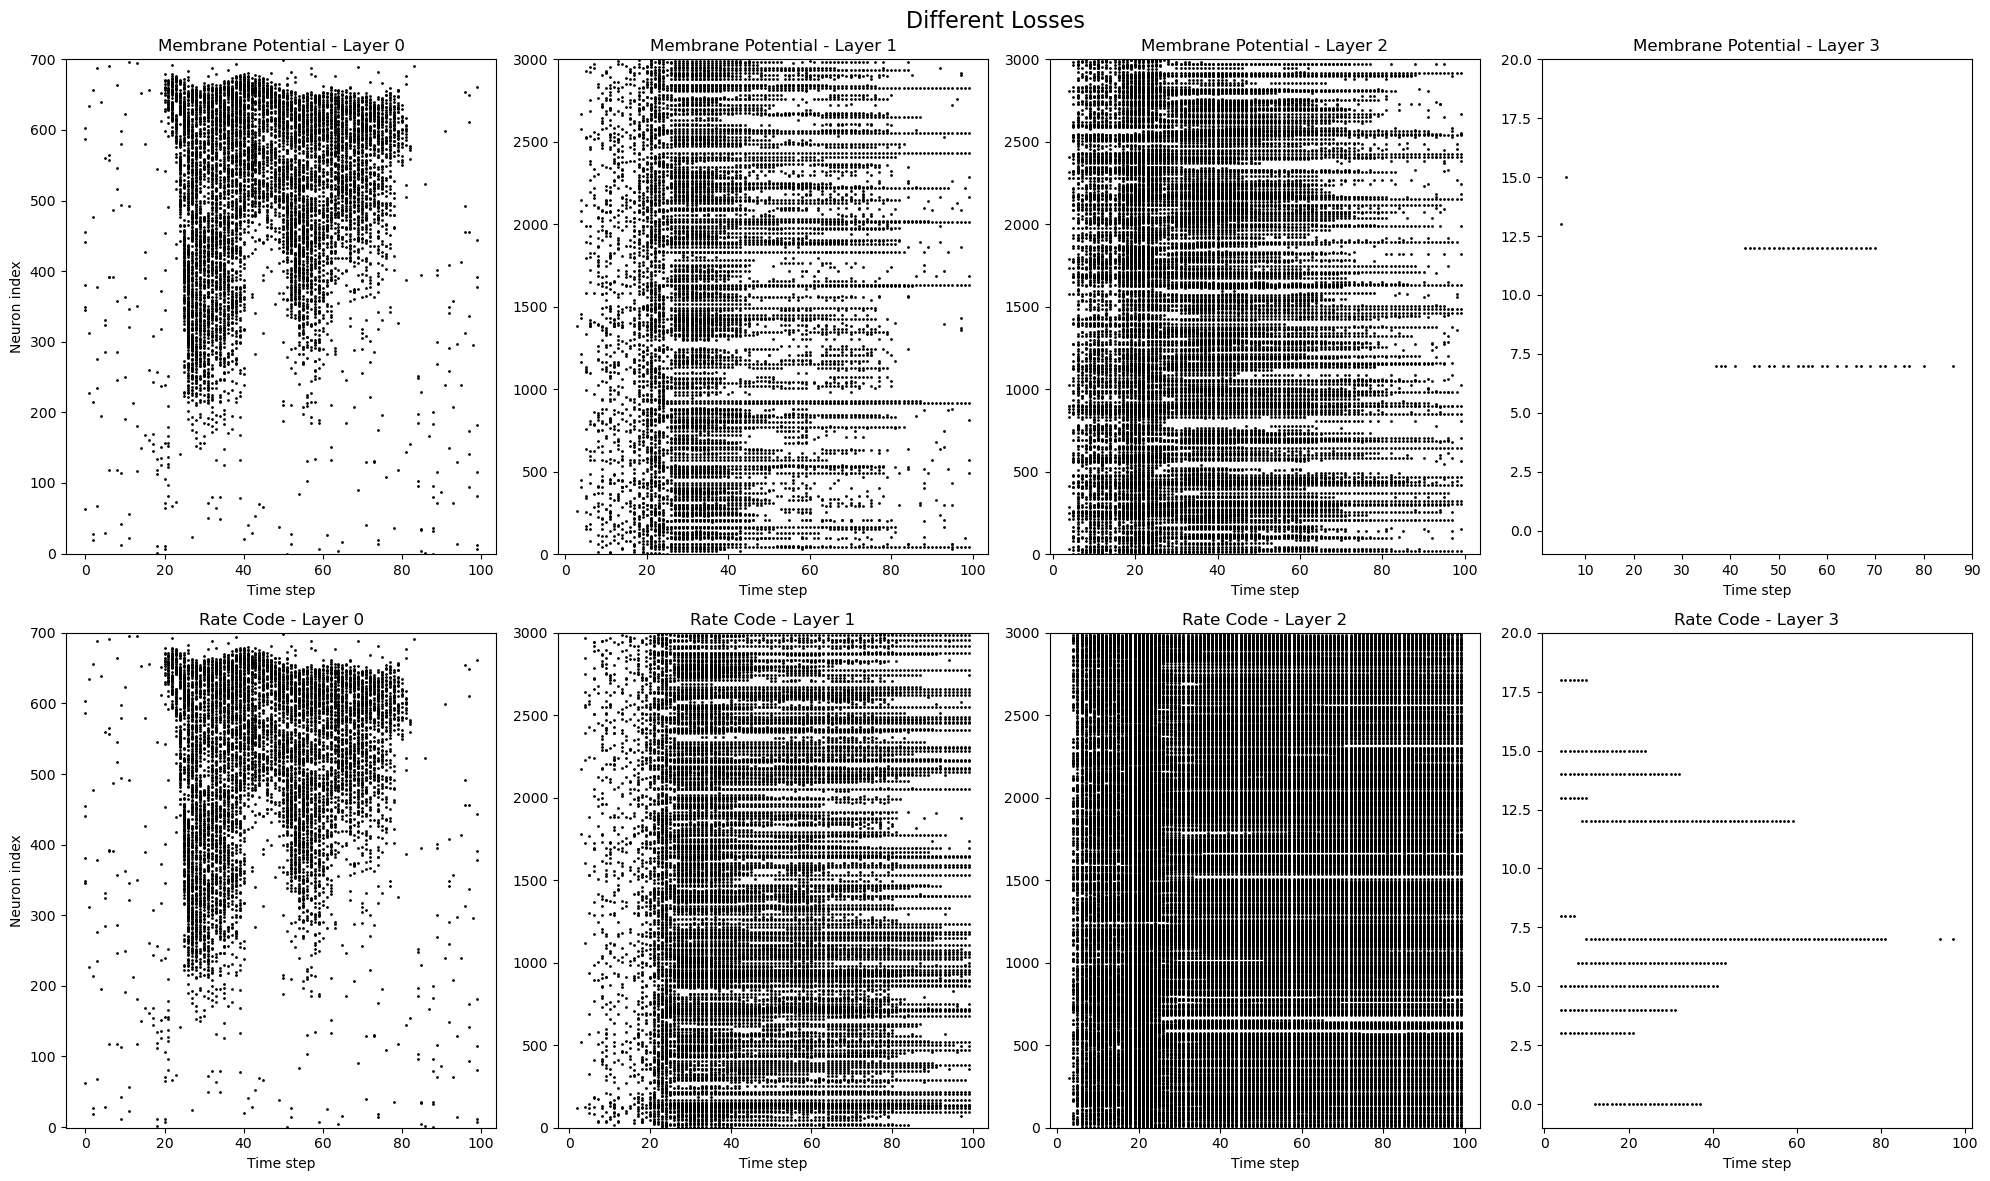

In [ ]:
from util.plot_layer_development import plot_layer_development

models = [
    membrane_potential_cross_entropy,
    rate_code_cross_entropy
]

plot_layer_development(models, data, selection_index, ["Membrane Potential", "Rate Code"], "Different Losses")

# Population coding with smaller number of timesteps

In [ ]:
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from training.train_snn import train_snn

TIME_STEPS = 100

NUMBER_HIDDEN_NEURONS = 1000
NUMBER_HIDDEN_LAYER = 1
beta = 0.99
threshold = 1

population_coding_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                    number_hidden_neurons=NUMBER_HIDDEN_NEURONS,
                                                    number_output_neurons=NUMBER_OUTPUT_NEURONS * 50,
                                                    beta=beta,
                                                    threshold=threshold,
                                                    time_steps=TIME_STEPS,
                                                    number_hidden_layers=NUMBER_HIDDEN_LAYER)

regular_loss_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                    number_hidden_neurons=NUMBER_HIDDEN_NEURONS,
                                                    number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                    beta=beta,
                                                    threshold=threshold,
                                                    time_steps=TIME_STEPS,
                                                    number_hidden_layers=NUMBER_HIDDEN_LAYER)

sparsity = 0

train_snn(population_coding_net, 
            num_epochs=20, 
            time_steps=TIME_STEPS,
            sparsity=sparsity, 
            loss_configuration='population_coding',
            output_file_path=f'./output/experiments_population_coding/1_timestep_population_coding.json')

/home/mark/anaconda3/envs/whk-snn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch: 0
loss 11821.667059718306
train accuracy 0.08925944090240313
test accuracy 0.2027582159624413
Epoch: 1


KeyboardInterrupt: 